<a href="https://colab.research.google.com/github/lukefreeman42/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS4_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
# y = "health outcome" - predicted variable - dependent variable
# x = "drug usage" - explanatory variable - independent variable

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here
random.seed(10) # Random Seed for reproducibility

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=172.07500125969045, mobile=False), User(purchased=False, time_on_site=242.1604565076447, mobile=True), User(purchased=True, time_on_site=172.4562884302345, mobile=True), User(purchased=False, time_on_site=134.30741730988564, mobile=True), User(purchased=False, time_on_site=176.6659151415657, mobile=False), User(purchased=False, time_on_site=98.57704667574383, mobile=True), User(purchased=False, time_on_site=141.90635886960914, mobile=True), User(purchased=False, time_on_site=46.30954508769639, mobile=True), User(purchased=True, time_on_site=568.9570603645093, mobile=False), User(purchased=False, time_on_site=64.57737234489078, mobile=True)]


In [0]:
# !pip freeze
!pip install pandas==0.23.4

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,172.075001,False
1,False,242.160457,True
2,True,172.456288,True
3,False,134.307417,True
4,False,176.665915,False


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.167894147962072,5.230051694531813,5.859655940198439,6.0175026563650755,6.029351938631506,6.076534025386882,7.530625255773601,7.817115390608255,7.825127435732432,7.9926238138229575,...,582.0038712877167,585.1679472229359,588.9784218509578,589.6238169166027,594.952201290341,595.4861528820476,595.6859588006147,597.9686255982785,599.821842253337,599.9043999383127
purchased,,,,,,,,,,,,,,,,,,,,,
False,0,1,1,0,1,1,1,1,1,0,...,1,1,0,1,1,1,0,0,1,0
True,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,1


In [0]:
# Let's use crosstabulation to try to see what's going on
# pd.crosstab(user_data['purchased'], user_data['time_on_site'], margins=True)

In [0]:
# Trying to show the margins on our Crosstab. Think this might be another 
# versioning issue.
# pd.crosstab(user_data['purchased'], time_bins, margins=True)

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.573, 124.115]","(124.115, 243.062]","(243.062, 362.01]","(362.01, 480.957]","(480.957, 599.904]"
purchased,,,,,
False,249,212,119,42,22
True,100,139,84,15,18


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.573, 124.115]","(124.115, 243.062]","(243.062, 362.01]","(362.01, 480.957]","(480.957, 599.904]"
purchased,,,,,
False,0.713467,0.603989,0.586207,0.736842,0.55
True,0.286533,0.396011,0.413793,0.263158,0.45


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.728,0.616
True,0.272,0.384


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins], 
            rownames=['device'], 
            colnames=["purchased", "time on site"], 
            normalize='index')
ct

purchased               False                                       \
time on site (4.573, 124.115] (124.115, 243.062] (243.062, 362.01]   
device                                                               
False                0.172000           0.120000          0.180000   
True                 0.274667           0.242667          0.098667   

purchased                                                    True   \
time on site (362.01, 480.957] (480.957, 599.904] (4.573, 124.115]   
device                                                               
False                    0.168              0.088         0.036000   
True                     0.000              0.000         0.121333   

purchased                                                            \
time on site (124.115, 243.062] (243.062, 362.01] (362.01, 480.957]   
device                                                                
False                  0.056000             0.048              0.06   
True                   0.166667             0.096              0.00   

purchased                        
time on site (480.957, 599.904]  
device                           
False                     0.072  
True                      0.000

In [0]:
# help(user_data.plot)

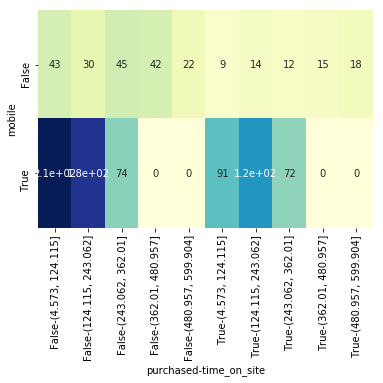

In [0]:
import seaborn as sns
sns.heatmap(pd.crosstab(user_data['mobile'],  [user_data['purchased'], time_bins] ),
            cmap="YlGnBu", annot=True, cbar=False)

In [0]:
# user_data.hist()

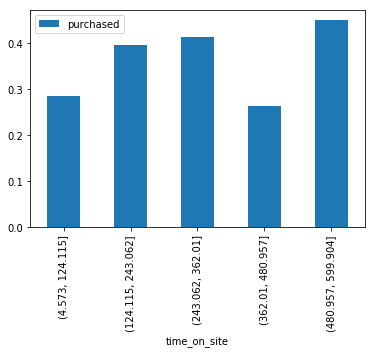

In [0]:
pd.pivot_table(user_data, values='purchased',
               index=time_bins).plot.bar()

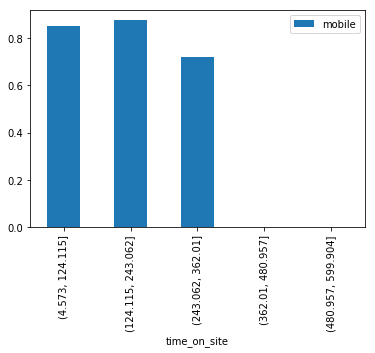

In [0]:
pd.pivot_table(
    user_data, values='mobile', index=time_bins).plot.bar();

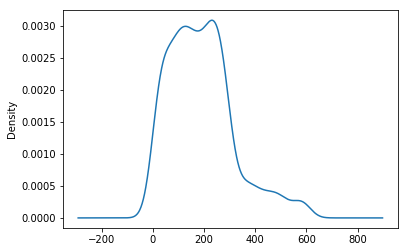

In [0]:
user_data['time_on_site'].plot.density();

In [0]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.573, 124.115]    0.236264  0.445887  0.132353  0.315972
(124.115, 243.062]  0.164835  0.393939  0.205882  0.434028
(243.062, 362.01]   0.247253  0.160173  0.176471  0.250000
(362.01, 480.957]   0.230769  0.000000  0.220588  0.000000
(480.957, 599.904]  0.120879  0.000000  0.264706  0.000000

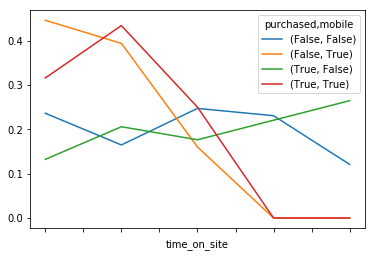

In [0]:
ct.plot();

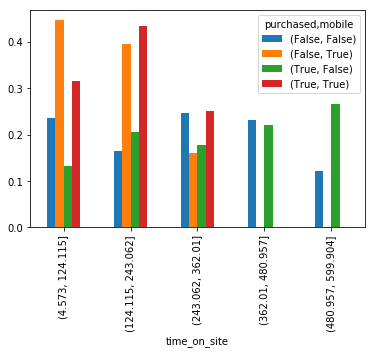

In [0]:
ct.plot(kind='bar')

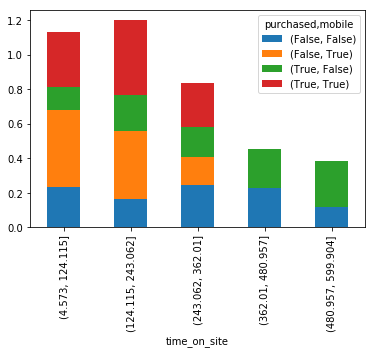

In [0]:
ct.plot(kind='bar', stacked=True)

In [0]:
time_bins = pd.cut(user_data['time_on_site'], 6)  # 6 equal-sized bins
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.573, 104.291]    0.181319  0.376623  0.073529  0.250000
(104.291, 203.413]  0.142857  0.333333  0.161765  0.340278
(203.413, 302.536]  0.192308  0.290043  0.220588  0.409722
(302.536, 401.659]  0.225275  0.000000  0.147059  0.000000
(401.659, 500.782]  0.164835  0.000000  0.176471  0.000000
(500.782, 599.904]  0.093407  0.000000  0.220588  0.000000

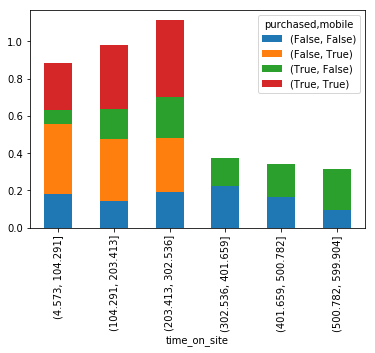

In [0]:
ct.plot(kind='bar', stacked=True)

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [22]:
df = pd.read_csv('./persons.csv')
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [21]:
print('SHAPE:\n',df.shape,'\n\nNULL COUNT:\n', df.isna().sum(),'\n\n\n',df.describe(),'\n\nTYPES:\n', df.dtypes) 

SHAPE:
 (1200, 4) 

NULL COUNT:
 Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64 


         Unnamed: 0          age       weight  exercise_time
count  1200.000000  1200.000000  1200.000000    1200.000000
mean    599.500000    48.396667   153.540833     134.910833
std     346.554469    18.166802    35.132182      85.548895
min       0.000000    18.000000   100.000000       0.000000
25%     299.750000    33.000000   125.000000      65.000000
50%     599.500000    48.000000   149.000000     122.000000
75%     899.250000    64.000000   180.250000     206.000000
max    1199.000000    80.000000   246.000000     300.000000 

TYPES:
 Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object


My hypothesis is that as excerise_time increases weight will in general decrease.

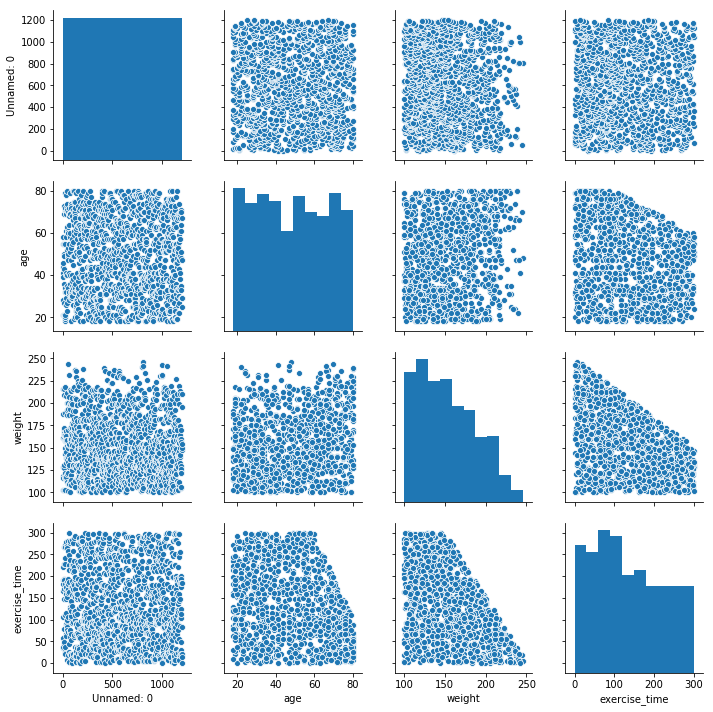

In [27]:
sns.pairplot(df); #get an overall view of relationship between variables.

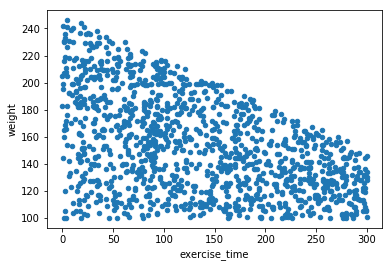

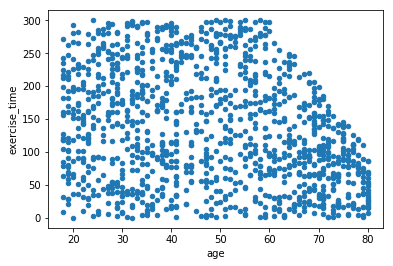

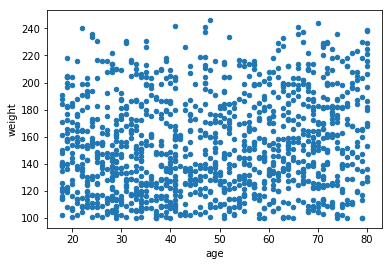

In [29]:
df.plot.scatter('exercise_time', 'weight');
df.plot.scatter('age', 'exercise_time');
df.plot.scatter('age', 'weight')

Additional hypothesis.
    There may be a link between age and weight, after age 60.

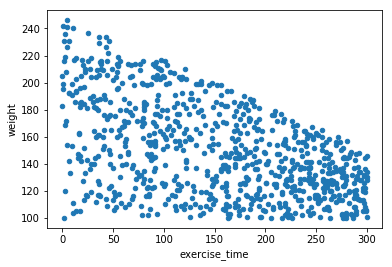

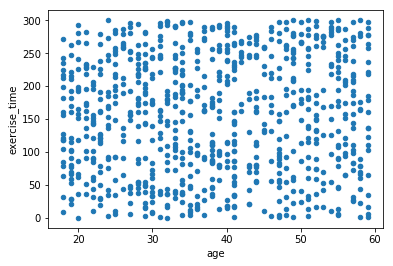

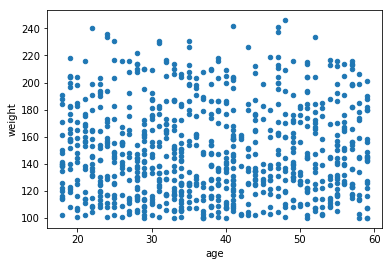

In [36]:
under_60 = df[df['age'] < 60]
under_60.plot.scatter('exercise_time', 'weight');
under_60.plot.scatter('age', 'exercise_time');
under_60.plot.scatter('age', 'weight');

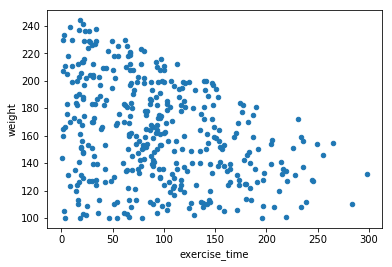

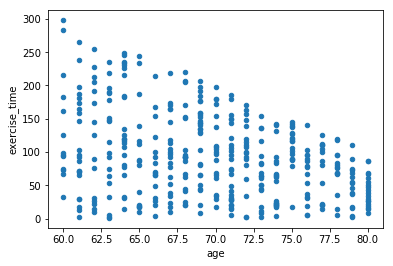

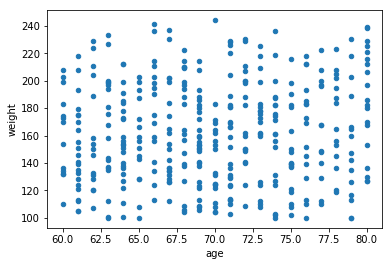

In [35]:
over_60 = df[df['age'] >= 60]
over_60.plot.scatter('exercise_time', 'weight');
over_60.plot.scatter('age', 'exercise_time');
over_60.plot.scatter('age', 'weight');

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
All 64bit length integers.
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)
- Use a groupby object to create some useful visualizations